In [ ]:
# =====================================================
# FULL PREPROCESSING PIPELINE (RAW → CLEAN → BALANCED)
# FEATURES: EXACT 1–28 (EXPERIMENT ALIGNED)
# =====================================================

# -----------------------------
# 1. INSTALL & IMPORT LIBRARIES
# -----------------------------
!pip install pandas numpy scikit-learn tldextract imbalanced-learn

import pandas as pd
import numpy as np
import re
import tldextract
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

# -----------------------------
# 2. LOAD RAW DATASET
# -----------------------------
df_raw = pd.read_csv('/content/drive/MyDrive/PSM/psm1/Dataset/FULL_DATASET_RAW_RECONSTRUCTED.csv')

print("===== BEFORE CLEANING =====")
print("Dataset Shape:", df_raw.shape)
print("Class Distribution:\n", df_raw['class'].value_counts())

# -----------------------------
# 3. DATA CLEANING
# -----------------------------
df_clean = df_raw.drop_duplicates().dropna().reset_index(drop=True)

print("\n===== AFTER CLEANING =====")
print("Dataset Shape:", df_clean.shape)
print("Class Distribution:\n", df_clean['class'].value_counts())

# -----------------------------
# 4. FEATURE EXTRACTION (1–28)
# -----------------------------
def extract_28_features(row):
    url = row['Url']
    name = row['name']
    ext = tldextract.extract(url)
    tokens = [t for t in re.split(r'\W+', url) if t]

    return [
        len(url),                                # 1 url_length
        url.count('.'),                          # 2 num_dots
        len(ext.suffix),                         # 3 tld_length
        len(ext.domain),                         # 4 domain_length
        int(any(c.isdigit() for c in url)),      # 5 has_numbers
        len(name),                               # 6 name_length
        url.count('.'),                          # 7 count_dots
        url.count('-'),                          # 8 count_hyphens
        url.count('/'),                          # 9 count_slashes
        sum(c.isdigit() for c in url),           # 10 count_numbers
        int(url.startswith('https')),            # 11 has_https
        int(any(c.isdigit() for c in name)),     # 12 has_digits_in_name
        int('movie' in url.lower()),             # 13 contains_movie
        int('tv' in url.lower()),                # 14 contains_tv
        int('download' in url.lower()),          # 15 contains_download
        int('stream' in url.lower()),            # 16 contains_stream
        sum(k in url.lower() for k in
            ['movie','tv','download','stream','free']),  # 17 piracy_keyword_count
        int(any(k in url.lower() for k in
            ['movie','tv','download','stream','free'])), # 18 contains_piracy_keyword
        int(bool(re.match(r'\d+\.\d+\.\d+\.\d+', ext.domain))), # 19 is_ip_domain
        sum(not c.isalnum() for c in url),        # 20 count_special_chars
        sum(not c.isalnum() for c in url)/len(url), # 21 percent_special_chars
        len(tokens),                             # 22 word_count
        len(set(tokens))/len(tokens),            # 23 unique_word_ratio
        -sum((url.count(c)/len(url))*np.log2(url.count(c)/len(url))
             for c in set(url)),                 # 24 url_entropy
        -sum((ext.domain.count(c)/len(ext.domain))*np.log2(ext.domain.count(c)/len(ext.domain))
             for c in set(ext.domain)),          # 25 domain_entropy
        np.mean([len(t) for t in tokens]),       # 26 avg_token_length
        max(len(t) for t in tokens)              # 27 max_token_length
    ]

feature_names = [
    'url_length','num_dots','tld_length','domain_length','has_numbers',
    'name_length','count_dots','count_hyphens','count_slashes',
    'count_numbers','has_https','has_digits_in_name','contains_movie',
    'contains_tv','contains_download','contains_stream',
    'piracy_keyword_count','contains_piracy_keyword','is_ip_domain',
    'count_special_chars','percent_special_chars','word_count',
    'unique_word_ratio','url_entropy','domain_entropy',
    'avg_token_length','max_token_length'
]

X = df_clean.apply(extract_28_features, axis=1, result_type='expand')
X.columns = feature_names
y = df_clean['class']

# -----------------------------
# 5. NORMALIZATION
# -----------------------------
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=feature_names)

# -----------------------------
# 6. BEFORE BALANCING
# -----------------------------
print("\n===== BEFORE BALANCING =====")
print(y.value_counts())

# -----------------------------
# 7. BALANCING (SMOTE)
# -----------------------------
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_scaled, y)

print("\n===== AFTER BALANCING =====")
print(y_balanced.value_counts())


# -----------------------------
# 8. DISPLAY DATASET (ROWS 1–10)
# -----------------------------

print("\n===== CLEAN DATASET (ROWS 1–10) =====")
display(clean_dataset.iloc[0:10])

print("\n===== CLEAN & BALANCED DATASET (ROWS 1–10) =====")
display(balanced_dataset.iloc[0:10])

# -----------------------------
# 9. FEATURE SUMMARY
# -----------------------------

print("\n===== FEATURE SUMMARY (STATISTICAL OVERVIEW) =====")

# Summary statistics for features only (exclude class)
feature_summary = clean_dataset.drop(columns=['class']).describe().T

# Round values for cleaner display
feature_summary = feature_summary.round(4)

# Display as table
display(feature_summary)



===== BEFORE CLEANING =====
Dataset Shape: (2006, 4)
Class Distribution:
 class
1    1003
0    1003
Name: count, dtype: int64

===== AFTER CLEANING =====
Dataset Shape: (1013, 4)
Class Distribution:
 class
0    1003
1      10
Name: count, dtype: int64

===== BEFORE BALANCING =====
class
0    1003
1      10
Name: count, dtype: int64

===== AFTER BALANCING =====
class
1    1003
0    1003
Name: count, dtype: int64

===== CLEAN DATASET (ROWS 1–10) =====


,url_length,num_dots,tld_length,domain_length,has_numbers,name_length,count_dots,count_hyphens,count_slashes,count_numbers,...,is_ip_domain,count_special_chars,percent_special_chars,word_count,unique_word_ratio,url_entropy,domain_entropy,avg_token_length,max_token_length,class
0,0.275,1.0,0.25,0.181818,0.0,0.173913,1.0,0.0,0.0,0.0,...,0.0,0.1,0.470699,0.2,0.0,0.458940,0.543908,0.255319,0.10,1
1,0.150,0.0,0.25,0.227273,0.0,0.260870,0.0,0.0,0.0,0.0,...,0.0,0.0,0.492754,0.0,0.0,0.621781,0.645870,0.276596,0.15,0
2,0.100,0.0,0.25,0.136364,0.0,0.173913,0.0,0.0,0.0,0.0,...,0.0,0.0,0.619565,0.0,0.0,0.493954,0.419405,0.191489,0.05,0
3,0.150,0.0,0.25,0.227273,0.0,0.260870,0.0,0.0,0.0,0.0,...,0.0,0.0,0.492754,0.0,0.0,0.487532,0.537978,0.276596,0.15,1
4,0.150,0.0,0.25,0.227273,0.0,0.260870,0.0,0.0,0.0,0.0,...,0.0,0.0,0.492754,0.0,0.0,0.462196,0.537978,0.276596,0.15,0
5,0.325,0.0,0.25,0.545455,0.0,0.565217,0.0,0.0,0.0,0.0,...,0.0,0.0,0.208696,0.0,0.0,0.686345,0.895238,0.574468,0.50,0
6,0.050,0.0,0.00,0.090909,0.0,0.130435,0.0,0.0,0.0,0.0,...,0.0,0.0,0.782609,0.0,0.0,0.258908,0.260076,0.106383,0.00,0
7,0.150,0.0,0.25,0.227273,0.0,0.260870,0.0,0.0,0.0,0.0,...,0.0,0.0,0.492754,0.0,0.0,0.462196,0.645870,0.276596,0.15,0
8,0.125,0.0,0.00,0.227273,0.0,0.260870,0.0,0.0,0.0,0.0,...,0.0,0.0,0.552430,0.0,0.0,0.391147,0.645870,0.234043,0.15,0
9,0.100,0.0,0.25,0.136364,0.0,0.173913,0.0,0.0,0.0,0.0,...,0.0,0.0,0.619565,0.0,0.0,0.314422,0.060296,0.191489,0.05,0



===== CLEAN & BALANCED DATASET (ROWS 1–10) =====


,url_length,num_dots,tld_length,domain_length,has_numbers,name_length,count_dots,count_hyphens,count_slashes,count_numbers,...,is_ip_domain,count_special_chars,percent_special_chars,word_count,unique_word_ratio,url_entropy,domain_entropy,avg_token_length,max_token_length,class
0,0.275,1.0,0.25,0.181818,0.0,0.173913,1.0,0.0,0.0,0.0,...,0.0,0.1,0.470699,0.2,0.0,0.458940,0.543908,0.255319,0.10,1
1,0.150,0.0,0.25,0.227273,0.0,0.260870,0.0,0.0,0.0,0.0,...,0.0,0.0,0.492754,0.0,0.0,0.621781,0.645870,0.276596,0.15,0
2,0.100,0.0,0.25,0.136364,0.0,0.173913,0.0,0.0,0.0,0.0,...,0.0,0.0,0.619565,0.0,0.0,0.493954,0.419405,0.191489,0.05,0
3,0.150,0.0,0.25,0.227273,0.0,0.260870,0.0,0.0,0.0,0.0,...,0.0,0.0,0.492754,0.0,0.0,0.487532,0.537978,0.276596,0.15,1
4,0.150,0.0,0.25,0.227273,0.0,0.260870,0.0,0.0,0.0,0.0,...,0.0,0.0,0.492754,0.0,0.0,0.462196,0.537978,0.276596,0.15,0
5,0.325,0.0,0.25,0.545455,0.0,0.565217,0.0,0.0,0.0,0.0,...,0.0,0.0,0.208696,0.0,0.0,0.686345,0.895238,0.574468,0.50,0
6,0.050,0.0,0.00,0.090909,0.0,0.130435,0.0,0.0,0.0,0.0,...,0.0,0.0,0.782609,0.0,0.0,0.258908,0.260076,0.106383,0.00,0
7,0.150,0.0,0.25,0.227273,0.0,0.260870,0.0,0.0,0.0,0.0,...,0.0,0.0,0.492754,0.0,0.0,0.462196,0.645870,0.276596,0.15,0
8,0.125,0.0,0.00,0.227273,0.0,0.260870,0.0,0.0,0.0,0.0,...,0.0,0.0,0.552430,0.0,0.0,0.391147,0.645870,0.234043,0.15,0
9,0.100,0.0,0.25,0.136364,0.0,0.173913,0.0,0.0,0.0,0.0,...,0.0,0.0,0.619565,0.0,0.0,0.314422,0.060296,0.191489,0.05,0



===== FEATURE SUMMARY (STATISTICAL OVERVIEW) =====


,count,mean,std,min,25%,50%,75%,max
url_length,1013.0,0.1327,0.0665,0.0,0.1000,0.1250,0.1500,1.0
num_dots,1013.0,0.0267,0.1611,0.0,0.0000,0.0000,0.0000,1.0
tld_length,1013.0,0.2095,0.1295,0.0,0.2500,0.2500,0.2500,1.0
domain_length,1013.0,0.1984,0.1030,0.0,0.1364,0.1818,0.2273,1.0
has_numbers,1013.0,0.4363,0.4962,0.0,0.0000,0.0000,1.0000,1.0
name_length,1013.0,0.2316,0.1005,0.0,0.1739,0.2174,0.2609,1.0
count_dots,1013.0,0.0267,0.1611,0.0,0.0000,0.0000,0.0000,1.0
count_hyphens,1013.0,0.0044,0.0519,0.0,0.0000,0.0000,0.0000,1.0
count_slashes,1013.0,0.0016,0.0347,0.0,0.0000,0.0000,0.0000,1.0
count_numbers,1013.0,0.1278,0.1778,0.0,0.0000,0.0000,0.2500,1.0


Dataset shape: (2006, 7)
   class  Keyword Pirated  url_length  num_dots  Top-Level Domain (TLD)  \
0      1               36          23         2                       7   
1      0               36          18         1                       7   
2      0               36          16         1                       7   
3      1               36          18         1                       7   
4      0               36          18         1                       7   

   domain_length  has_numbers  
0             16            0  
1             11            0  
2              9            0  
3             11            0  
4             11            0  
Removing leakage: ['Keyword Pirated']

================ Training RNN Model ================
Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5448 - loss: 0.6778
Epoch 2/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5618 - loss: 0.6611
Epoch 3/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5775 - loss: 0.6527
Epoch 4/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6315 - loss: 0.6439
Epoch 5/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6096 - loss: 0.6340
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

================ Training LSTM Model ================
Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5615 - loss: 0.6885
Epoch 2/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5575 - loss: 0.6812
Epoch 3/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5557 - loss: 0.6717
Epoch 4/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5755 - loss: 0.6598
Epoch 5/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5643 - loss: 0.6544
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

================ MODEL PERFORMANCE COMPARISON ================
Model      Accuracy   Precision  Recall     F1-Score  
RNN      0.6642     0.6928       0.5779     0.6301
LSTM     0.6244     0.6062       0.6884     0.6447
Epoch 1/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6343 - loss: 0.6300 - val_accuracy: 0.6219 - val_loss: 0.6111
Epoch 2/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6639 - loss: 0.6196 - val_accuracy: 0.6070 - val_loss: 0.6074
Epoch 3/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6545 - loss: 0.6202 -

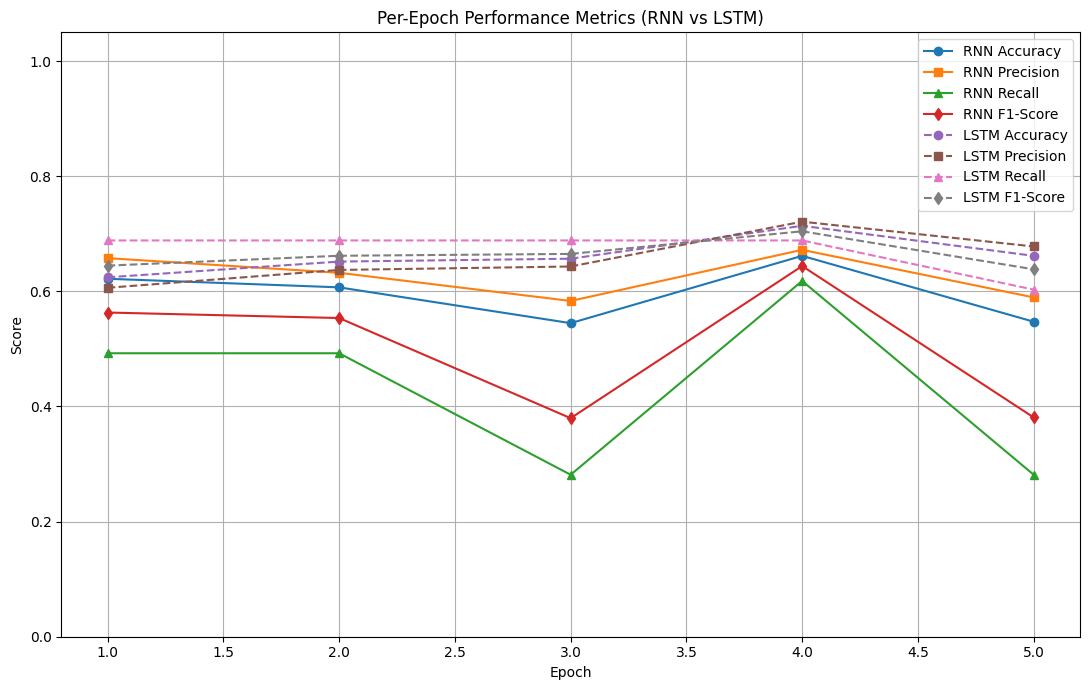

In [ ]:
# ======================================
# INSTALL LIBRARIES
# ======================================
!pip install tensorflow scikit-learn pandas numpy xgboost

# ======================================
# IMPORT LIBRARIES
# ======================================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, SimpleRNN, Dense, Dropout

# ======================================
# LOAD DATASET
# ======================================
df = pd.read_csv("/content/drive/MyDrive/PSM/psm1/Dataset/Features 1-7.csv")

print("Dataset shape:", df.shape)
print(df.head())

# ===============================
# REMOVE LEAKAGE 100% SAFELY
# ===============================
leakage_keywords = [
    "keyword", "pirated", "movie", "film", "title",
    "is_pirated", "movie_keyword", "contains", "found", "match",
    "label", "target"
]
# Drop leakage columns to ensure fair learning
cols_to_drop = [c for c in df.columns if any(k in c.lower() for k in leakage_keywords)]
print("Removing leakage:", cols_to_drop)

df = df.drop(columns=cols_to_drop, errors="ignore")

# ======================================
# SPLIT FEATURES & LABEL
# ======================================
X = df.drop("class", axis=1)          # Input features
y = df["class"].astype(int)           # Target labels (0 = benign, 1 = pirated)

# ======================================
# SCALE FEATURES
# ======================================
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Save normal 2D scaled for ML models
X2 = X_scaled.copy()

# ======================================
# RESHAPE FOR RNN / LSTM INPUT
# Shape required: (samples, timesteps, features)
# ======================================

# RNN/LSTM require 3D input: (samples, timesteps, features)
X_rnn = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Train / Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_rnn, y, test_size=0.2, random_state=42, shuffle=True
)

# ======================================
# MODEL 1:  RNN
# ======================================
rnn_model = Sequential([
    SimpleRNN(64, activation="tanh", input_shape=(1, X_rnn.shape[2])),  # LSTM layer with gating
    Dropout(0.3),                                                       # Prevent overfitting
    Dense(1, activation="sigmoid")                                      # Binary output layer
])

rnn_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

print("\n================ Training RNN Model ================")
rnn_model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=1)

# Predict
rnn_pred = (rnn_model.predict(X_test) > 0.5).astype(int)

# Evaluate
rnn_acc = accuracy_score(y_test, rnn_pred)
rnn_prec = precision_score(y_test, rnn_pred)
rnn_rec = recall_score(y_test, rnn_pred)
rnn_f1 = f1_score(y_test, rnn_pred)

# ======================================
# MODEL 2: LSTM
# ======================================
lstm_model = Sequential([
    LSTM(64, activation="tanh", input_shape=(1, X_rnn.shape[2])),
    Dropout(0.3),
    Dense(1, activation="sigmoid")
])

lstm_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

print("\n================ Training LSTM Model ================")
lstm_model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=1)

# Predict
lstm_pred = (lstm_model.predict(X_test) > 0.5).astype(int)

# Evaluate
lstm_acc = accuracy_score(y_test, lstm_pred)
lstm_prec = precision_score(y_test, lstm_pred)
lstm_rec = recall_score(y_test, lstm_pred)
lstm_f1 = f1_score(y_test, lstm_pred)

# ======================================
# PERFORMANCE COMPARISON TABLE
# ======================================
print("\n================ MODEL PERFORMANCE COMPARISON ================")
print(f"{'Model':<10} {'Accuracy':<10} {'Precision':<10} {'Recall':<10} {'F1-Score':<10}")
print(f"RNN      {rnn_acc:.4f}     {rnn_prec:.4f}       {rnn_rec:.4f}     {rnn_f1:.4f}")
print(f"LSTM     {lstm_acc:.4f}     {lstm_prec:.4f}       {lstm_rec:.4f}     {lstm_f1:.4f}")


import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.callbacks import Callback

# ======================================
# PER-EPOCH METRICS CALLBACK
# ======================================
class MetricsCallback(Callback):
    def __init__(self, X_val, y_val):
        super().__init__()
        self.X_val = X_val
        self.y_val = y_val
        self.acc = []
        self.prec = []
        self.rec = []
        self.f1 = []

    def on_epoch_end(self, epoch, logs=None):
        y_pred = (self.model.predict(self.X_val, verbose=0) > 0.5).astype(int)

        self.acc.append(accuracy_score(self.y_val, y_pred))
        self.prec.append(precision_score(self.y_val, y_pred))
        self.rec.append(recall_score(self.y_val, y_pred))
        self.f1.append(f1_score(self.y_val, y_pred))

# ======================================
# TRAIN MODELS
# ======================================
epochs = 5

rnn_cb = MetricsCallback(X_test, y_test)
lstm_cb = MetricsCallback(X_test, y_test)

rnn_model.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[rnn_cb],
    verbose=1
)

lstm_model.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[lstm_cb],
    verbose=1
)

# ======================================
# PLOT GRAPH (X-AXIS = EPOCH)
# ======================================
epoch_range = np.arange(1, epochs + 1)

plt.figure(figsize=(11,7))

# RNN metrics
plt.plot(epoch_range, rnn_cb.acc, marker='o', label='RNN Accuracy')
plt.plot(epoch_range, rnn_cb.prec, marker='s', label='RNN Precision')
plt.plot(epoch_range, rnn_cb.rec, marker='^', label='RNN Recall')
plt.plot(epoch_range, rnn_cb.f1, marker='d', label='RNN F1-Score')

# LSTM metrics
plt.plot(epoch_range, lstm_cb.acc, marker='o', linestyle='--', label='LSTM Accuracy')
plt.plot(epoch_range, lstm_cb.prec, marker='s', linestyle='--', label='LSTM Precision')
plt.plot(epoch_range, lstm_cb.rec, marker='^', linestyle='--', label='LSTM Recall')
plt.plot(epoch_range, lstm_cb.f1, marker='d', linestyle='--', label='LSTM F1-Score')

plt.xlabel("Epoch")
plt.ylabel("Score")
plt.title("Per-Epoch Performance Metrics (RNN vs LSTM)")
plt.ylim(0, 1.05)
plt.grid(True)
plt.legend(loc="best")

plt.tight_layout()
plt.show()







Dataset shape: (2006, 14)
   class  Keyword Pirated  url_length  num_dots  Top-Level Domain (TLD)  \
0      1               36          23         2                       7   
1      0               36          18         1                       7   
2      0               36          16         1                       7   
3      1               36          18         1                       7   
4      0               36          18         1                       7   

   domain_length  has_numbers  url_length.1  domain_length.1  name_length  \
0             16            0            23               16            5   
1             11            0            18               11            7   
2              9            0            16                9            5   
3             11            0            18               11            7   
4             11            0            18               11            7   

   count_dots  count_hyphens  count_slashes  count_numbers  

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5471 - loss: 0.6947
Epoch 2/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6456 - loss: 0.6439
Epoch 3/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6636 - loss: 0.6268
Epoch 4/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6498 - loss: 0.6283
Epoch 5/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6779 - loss: 0.6105
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

================ Training LSTM Model ================
Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5055 - loss: 0.6882
Epoch 2/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6205 - loss: 0.6691
Epoch 3/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6058 - loss: 0.6537
Epoch 4/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6130 - loss: 0.6289
Epoch 5/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6486 - loss: 0.6278
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

================ MODEL PERFORMANCE COMPARISON ================
Model      Accuracy   Precision  Recall     F1-Score  
RNN      0.6219     0.6577       0.4925     0.5632
LSTM     0.6393     0.6227       0.6884     0.6539
Epoch 1/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6697 - loss: 0.6040 - val_accuracy: 0.6119 - val_loss: 0.5965
Epoch 2/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6259 - loss: 0.6078 - val_accuracy: 0.6990 - val_loss: 0.5913
Epoch 3/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6339 - loss: 0.6081 -

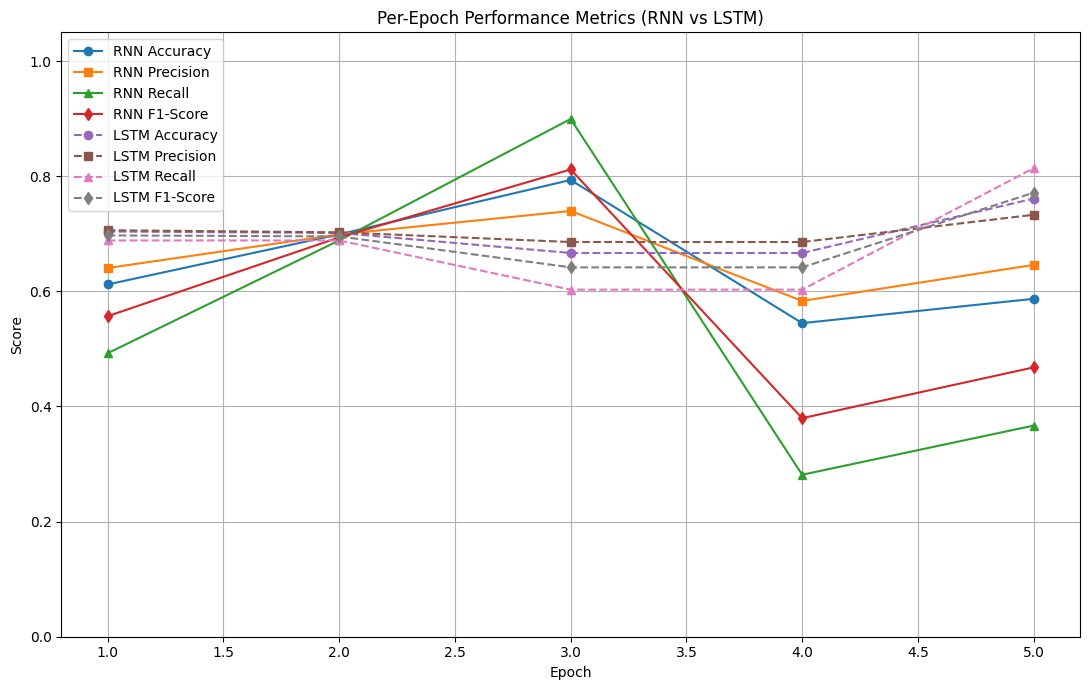

In [ ]:
# ======================================
# INSTALL LIBRARIES
# ======================================
!pip install tensorflow scikit-learn pandas numpy xgboost

# ======================================
# IMPORT LIBRARIES
# ======================================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, SimpleRNN, Dense, Dropout

# ======================================
# LOAD DATASET
# ======================================
df = pd.read_csv("/content/drive/MyDrive/PSM/psm1/Dataset/Features 1-14.csv")

print("Dataset shape:", df.shape)
print(df.head())

# ===============================
# REMOVE LEAKAGE 100% SAFELY
# ===============================
leakage_keywords = [
    "keyword", "pirated", "movie", "film", "title",
    "is_pirated", "movie_keyword", "contains", "found", "match",
    "label", "target"
]

cols_to_drop = [c for c in df.columns if any(k in c.lower() for k in leakage_keywords)]
print("Removing leakage:", cols_to_drop)

df = df.drop(columns=cols_to_drop, errors="ignore")

# ======================================
# SPLIT FEATURES & LABEL
# ======================================
X = df.drop("class", axis=1)
y = df["class"].astype(int)

# ======================================
# SCALE FEATURES
# ======================================
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Save normal 2D scaled for ML models
X2 = X_scaled.copy()

# ======================================
# RESHAPE FOR RNN / LSTM INPUT
# Shape required: (samples, timesteps, features)
# ======================================
X_rnn = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Train / Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_rnn, y, test_size=0.2, random_state=42, shuffle=True
)

# ======================================
# MODEL 1:  RNN
# ======================================
rnn_model = Sequential([
    SimpleRNN(64, activation="tanh", input_shape=(1, X_rnn.shape[2])),
    Dropout(0.3),
    Dense(1, activation="sigmoid")
])

rnn_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

print("\n================ Training RNN Model ================")
rnn_model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=1)

# Predict
rnn_pred = (rnn_model.predict(X_test) > 0.5).astype(int)

# Evaluate
rnn_acc = accuracy_score(y_test, rnn_pred)
rnn_prec = precision_score(y_test, rnn_pred)
rnn_rec = recall_score(y_test, rnn_pred)
rnn_f1 = f1_score(y_test, rnn_pred)

# ======================================
# MODEL 2: LSTM
# ======================================
lstm_model = Sequential([
    LSTM(64, activation="tanh", input_shape=(1, X_rnn.shape[2])),
    Dropout(0.3),
    Dense(1, activation="sigmoid")
])

lstm_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

print("\n================ Training LSTM Model ================")
lstm_model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=1)

# Predict
lstm_pred = (lstm_model.predict(X_test) > 0.5).astype(int)

# Evaluate
lstm_acc = accuracy_score(y_test, lstm_pred)
lstm_prec = precision_score(y_test, lstm_pred)
lstm_rec = recall_score(y_test, lstm_pred)
lstm_f1 = f1_score(y_test, lstm_pred)

# ======================================
# PERFORMANCE COMPARISON TABLE
# ======================================
print("\n================ MODEL PERFORMANCE COMPARISON ================")
print(f"{'Model':<10} {'Accuracy':<10} {'Precision':<10} {'Recall':<10} {'F1-Score':<10}")
print(f"RNN      {rnn_acc:.4f}     {rnn_prec:.4f}       {rnn_rec:.4f}     {rnn_f1:.4f}")
print(f"LSTM     {lstm_acc:.4f}     {lstm_prec:.4f}       {lstm_rec:.4f}     {lstm_f1:.4f}")


import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.callbacks import Callback

# ======================================
# PER-EPOCH METRICS CALLBACK
# ======================================
class MetricsCallback(Callback):
    def __init__(self, X_val, y_val):
        super().__init__()
        self.X_val = X_val
        self.y_val = y_val
        self.acc = []
        self.prec = []
        self.rec = []
        self.f1 = []

    def on_epoch_end(self, epoch, logs=None):
        y_pred = (self.model.predict(self.X_val, verbose=0) > 0.5).astype(int)

        self.acc.append(accuracy_score(self.y_val, y_pred))
        self.prec.append(precision_score(self.y_val, y_pred))
        self.rec.append(recall_score(self.y_val, y_pred))
        self.f1.append(f1_score(self.y_val, y_pred))

# ======================================
# TRAIN MODELS
# ======================================
epochs = 5

rnn_cb = MetricsCallback(X_test, y_test)
lstm_cb = MetricsCallback(X_test, y_test)

rnn_model.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[rnn_cb],
    verbose=1
)

lstm_model.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[lstm_cb],
    verbose=1
)

# ======================================
# PLOT GRAPH (X-AXIS = EPOCH)
# ======================================
epoch_range = np.arange(1, epochs + 1)

plt.figure(figsize=(11,7))

# RNN metrics
plt.plot(epoch_range, rnn_cb.acc, marker='o', label='RNN Accuracy')
plt.plot(epoch_range, rnn_cb.prec, marker='s', label='RNN Precision')
plt.plot(epoch_range, rnn_cb.rec, marker='^', label='RNN Recall')
plt.plot(epoch_range, rnn_cb.f1, marker='d', label='RNN F1-Score')

# LSTM metrics
plt.plot(epoch_range, lstm_cb.acc, marker='o', linestyle='--', label='LSTM Accuracy')
plt.plot(epoch_range, lstm_cb.prec, marker='s', linestyle='--', label='LSTM Precision')
plt.plot(epoch_range, lstm_cb.rec, marker='^', linestyle='--', label='LSTM Recall')
plt.plot(epoch_range, lstm_cb.f1, marker='d', linestyle='--', label='LSTM F1-Score')

plt.xlabel("Epoch")
plt.ylabel("Score")
plt.title("Per-Epoch Performance Metrics (RNN vs LSTM)")
plt.ylim(0, 1.05)
plt.grid(True)
plt.legend(loc="best")

plt.tight_layout()
plt.show()


Dataset shape: (2006, 28)
   class  Keyword Pirated  url_length  num_dots  Top-Level Domain (TLD)  \
0      1               36          23         2                       7   
1      0               36          18         1                       7   
2      0               36          16         1                       7   
3      1               36          18         1                       7   
4      0               36          18         1                       7   

   domain_length  has_numbers  url_length.1  domain_length.1  name_length  \
0             16            0            23               16            5   
1             11            0            18               11            7   
2              9            0            16                9            5   
3             11            0            18               11            7   
4             11            0            18               11            7   

   ...  contains_download  contains_stream  piracy_keyword_c

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5740 - loss: 0.6813
Epoch 2/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6437 - loss: 0.6422
Epoch 3/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6999 - loss: 0.5942
Epoch 4/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7105 - loss: 0.5893
Epoch 5/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7397 - loss: 0.5451
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

================ Training LSTM Model ================
Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5901 - loss: 0.6869
Epoch 2/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6340 - loss: 0.6548
Epoch 3/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6921 - loss: 0.6226
Epoch 4/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7286 - loss: 0.5898
Epoch 5/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7395 - loss: 0.5581
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step

================ MODEL PERFORMANCE COMPARISON ================
Model      Accuracy   Precision  Recall     F1-Score  
RNN      0.7264     0.7543       0.6633     0.7059
LSTM     0.7438     0.7857       0.6633     0.7193
Epoch 1/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7189 - loss: 0.5486 - val_accuracy: 0.7139 - val_loss: 0.5141
Epoch 2/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7306 - loss: 0.5256 - val_accuracy: 0.7413 - val_loss: 0.5056
Epoch 3/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7348 - loss: 0.5098

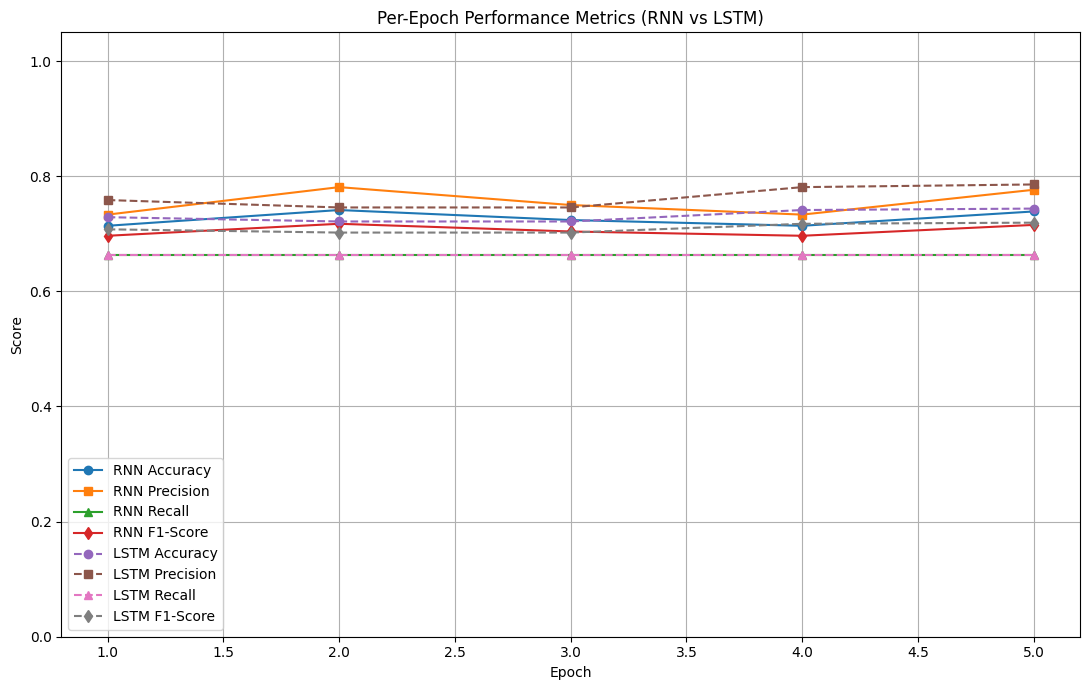

In [ ]:
# ======================================
# INSTALL LIBRARIES
# ======================================
!pip install tensorflow scikit-learn pandas numpy xgboost

# ======================================
# IMPORT LIBRARIES
# ======================================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, SimpleRNN, Dense, Dropout

# ======================================
# LOAD DATASET
# ======================================
df = pd.read_csv("/content/drive/MyDrive/PSM/psm1/Dataset/Features 1-28.csv")

print("Dataset shape:", df.shape)
print(df.head())

# ===============================
# REMOVE LEAKAGE 100% SAFELY
# ===============================
leakage_keywords = [
    "keyword", "pirated", "movie", "film", "title",
    "is_pirated", "movie_keyword", "contains", "found", "match",
    "label", "target"
]

cols_to_drop = [c for c in df.columns if any(k in c.lower() for k in leakage_keywords)]
print("Removing leakage:", cols_to_drop)

df = df.drop(columns=cols_to_drop, errors="ignore")

# ======================================
# SPLIT FEATURES & LABEL
# ======================================
X = df.drop("class", axis=1)
y = df["class"].astype(int)

# ======================================
# SCALE FEATURES
# ======================================
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Save normal 2D scaled for ML models
X2 = X_scaled.copy()

# ======================================
# RESHAPE FOR RNN / LSTM INPUT
# Shape required: (samples, timesteps, features)
# ======================================
X_rnn = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Train / Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_rnn, y, test_size=0.2, random_state=42, shuffle=True
)

# ======================================
# MODEL 1: RNN
# ======================================
rnn_model = Sequential([
    SimpleRNN(64, activation="tanh", input_shape=(1, X_rnn.shape[2])),
    Dropout(0.3),
    Dense(1, activation="sigmoid")
])

rnn_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

print("\n================ Training RNN Model ================")
rnn_model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=1)

# Predict
rnn_pred = (rnn_model.predict(X_test) > 0.5).astype(int)

# Evaluate
rnn_acc = accuracy_score(y_test, rnn_pred)
rnn_prec = precision_score(y_test, rnn_pred)
rnn_rec = recall_score(y_test, rnn_pred)
rnn_f1 = f1_score(y_test, rnn_pred)

# ======================================
# MODEL 2: LSTM
# ======================================
lstm_model = Sequential([
    LSTM(64, activation="tanh", input_shape=(1, X_rnn.shape[2])),
    Dropout(0.3),
    Dense(1, activation="sigmoid")
])

lstm_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

print("\n================ Training LSTM Model ================")
lstm_model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=1)

# Predict
lstm_pred = (lstm_model.predict(X_test) > 0.5).astype(int)

# Evaluate
lstm_acc = accuracy_score(y_test, lstm_pred)
lstm_prec = precision_score(y_test, lstm_pred)
lstm_rec = recall_score(y_test, lstm_pred)
lstm_f1 = f1_score(y_test, lstm_pred)

# ======================================
# PERFORMANCE COMPARISON TABLE
# ======================================
print("\n================ MODEL PERFORMANCE COMPARISON ================")
print(f"{'Model':<10} {'Accuracy':<10} {'Precision':<10} {'Recall':<10} {'F1-Score':<10}")
print(f"RNN      {rnn_acc:.4f}     {rnn_prec:.4f}       {rnn_rec:.4f}     {rnn_f1:.4f}")
print(f"LSTM     {lstm_acc:.4f}     {lstm_prec:.4f}       {lstm_rec:.4f}     {lstm_f1:.4f}")

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.callbacks import Callback

# ======================================
# PER-EPOCH METRICS CALLBACK
# ======================================
class MetricsCallback(Callback):
    def __init__(self, X_val, y_val):
        super().__init__()
        self.X_val = X_val
        self.y_val = y_val
        self.acc = []
        self.prec = []
        self.rec = []
        self.f1 = []

    def on_epoch_end(self, epoch, logs=None):
        y_pred = (self.model.predict(self.X_val, verbose=0) > 0.5).astype(int)

        self.acc.append(accuracy_score(self.y_val, y_pred))
        self.prec.append(precision_score(self.y_val, y_pred))
        self.rec.append(recall_score(self.y_val, y_pred))
        self.f1.append(f1_score(self.y_val, y_pred))

# ======================================
# TRAIN MODELS
# ======================================
epochs = 5

rnn_cb = MetricsCallback(X_test, y_test)
lstm_cb = MetricsCallback(X_test, y_test)

rnn_model.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[rnn_cb],
    verbose=1
)

lstm_model.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[lstm_cb],
    verbose=1
)

# ======================================
# PLOT GRAPH (X-AXIS = EPOCH)
# ======================================
epoch_range = np.arange(1, epochs + 1)

plt.figure(figsize=(11,7))

# RNN metrics
plt.plot(epoch_range, rnn_cb.acc, marker='o', label='RNN Accuracy')
plt.plot(epoch_range, rnn_cb.prec, marker='s', label='RNN Precision')
plt.plot(epoch_range, rnn_cb.rec, marker='^', label='RNN Recall')
plt.plot(epoch_range, rnn_cb.f1, marker='d', label='RNN F1-Score')

# LSTM metrics
plt.plot(epoch_range, lstm_cb.acc, marker='o', linestyle='--', label='LSTM Accuracy')
plt.plot(epoch_range, lstm_cb.prec, marker='s', linestyle='--', label='LSTM Precision')
plt.plot(epoch_range, lstm_cb.rec, marker='^', linestyle='--', label='LSTM Recall')
plt.plot(epoch_range, lstm_cb.f1, marker='d', linestyle='--', label='LSTM F1-Score')

plt.xlabel("Epoch")
plt.ylabel("Score")
plt.title("Per-Epoch Performance Metrics (RNN vs LSTM)")
plt.ylim(0, 1.05)
plt.grid(True)
plt.legend(loc="best")

plt.tight_layout()
plt.show()


Dataset shape: (2006, 28)
   class  Keyword Pirated  url_length  num_dots  Top-Level Domain (TLD)  \
0      1               36          23         2                       7   
1      0               36          18         1                       7   
2      0               36          16         1                       7   
3      1               36          18         1                       7   
4      0               36          18         1                       7   

   domain_length  has_numbers  url_length.1  domain_length.1  name_length  \
0             16            0            23               16            5   
1             11            0            18               11            7   
2              9            0            16                9            5   
3             11            0            18               11            7   
4             11            0            18               11            7   

   ...  contains_download  contains_stream  piracy_keyword_c

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5848 - loss: 0.6727
Epoch 2/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6717 - loss: 0.6275
Epoch 3/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7110 - loss: 0.5868
Epoch 4/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7339 - loss: 0.5551
Epoch 5/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7310 - loss: 0.5319
Epoch 6/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7143 - loss: 0.5250
Epoch 7/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7367 - loss: 0.5176
Epoch 8/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7470 - loss: 0.5062
Epoch 9/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7366 - loss: 0.5141
Epoch 10/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7384 - loss: 0.5103
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

================ Training LSTM Model ================
Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5667 - loss: 0.6831
Epoch 2/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6162 - loss: 0.6559
Epoch 3/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6603 - loss: 0.6233
Epoch 4/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7389 - loss: 0.5999
Epoch 5/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7468 - loss: 0.5592
Epoch 6/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7233 - loss: 0.5391
Epoch 7/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7276 - loss: 0.5334
Epoch 8/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7334 - loss: 0.4872
Epoch 9/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7532 - loss: 0.4928
Epoch 10/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7332 - loss: 0.4979
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

================ MODEL PERFORMANCE COMPARISON ================
Model      Accuracy   Precision  Recall     F1-Score  
RNN      0.

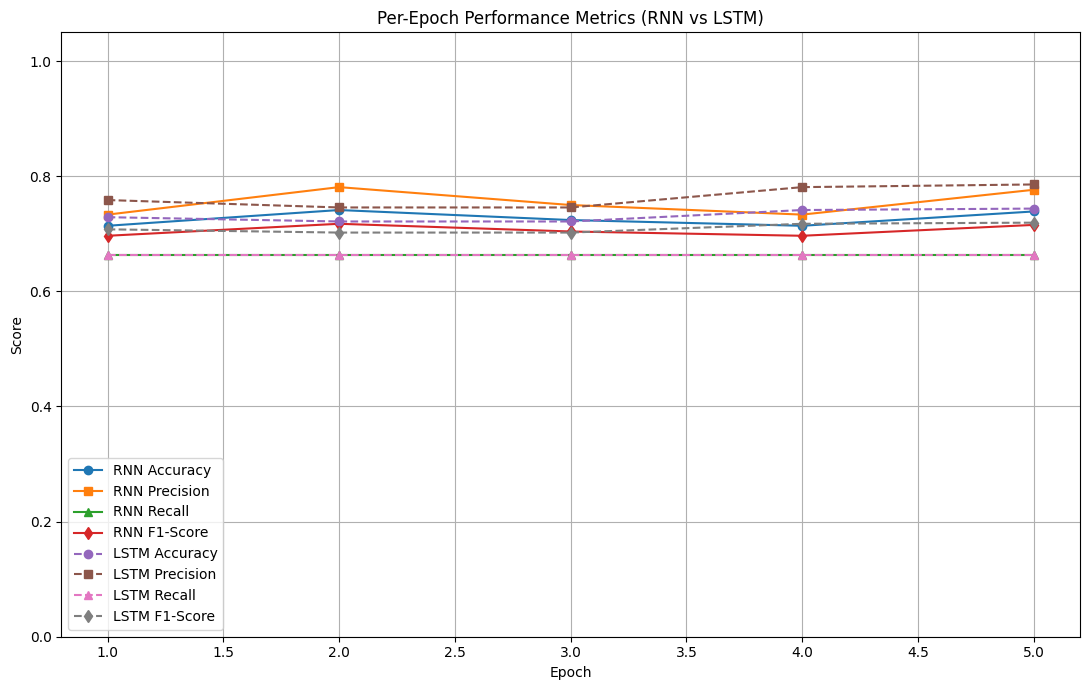

In [ ]:
# ======================================
# INSTALL LIBRARIES
# ======================================
!pip install tensorflow scikit-learn pandas numpy xgboost

# ======================================
# IMPORT LIBRARIES
# ======================================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, SimpleRNN, Dense, Dropout

# ======================================
# LOAD DATASET
# ======================================
df = pd.read_csv("/content/drive/MyDrive/PSM/psm1/Dataset/Features 1-28.csv")

print("Dataset shape:", df.shape)
print(df.head())

# ===============================
# REMOVE LEAKAGE 100% SAFELY
# ===============================
leakage_keywords = [
    "keyword", "pirated", "movie", "film", "title",
    "is_pirated", "movie_keyword", "contains", "found", "match",
    "label", "target"
]

cols_to_drop = [c for c in df.columns if any(k in c.lower() for k in leakage_keywords)]
print("Removing leakage:", cols_to_drop)

df = df.drop(columns=cols_to_drop, errors="ignore")

# ======================================
# SPLIT FEATURES & LABEL
# ======================================
X = df.drop("class", axis=1)
y = df["class"].astype(int)

# ======================================
# SCALE FEATURES
# ======================================
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Save normal 2D scaled for ML models
X2 = X_scaled.copy()

# ======================================
# RESHAPE FOR RNN / LSTM INPUT
# Shape required: (samples, timesteps, features)
# ======================================
X_rnn = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Train / Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_rnn, y, test_size=0.2, random_state=42, shuffle=True
)

# ======================================
# MODEL 1:  RNN
# ======================================
rnn_model = Sequential([
    SimpleRNN(64, activation="tanh", input_shape=(1, X_rnn.shape[2])),
    Dropout(0.3),
    Dense(1, activation="sigmoid")
])

rnn_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

print("\n================ Training RNN Model ================")
rnn_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Predict
rnn_pred = (rnn_model.predict(X_test) > 0.5).astype(int)

# Evaluate
rnn_acc = accuracy_score(y_test, rnn_pred)
rnn_prec = precision_score(y_test, rnn_pred)
rnn_rec = recall_score(y_test, rnn_pred)
rnn_f1 = f1_score(y_test, rnn_pred)

# ======================================
# MODEL 2: LSTM
# ======================================
lstm_model = Sequential([
    LSTM(64, activation="tanh", input_shape=(1, X_rnn.shape[2])),
    Dropout(0.3),
    Dense(1, activation="sigmoid")
])

lstm_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

print("\n================ Training LSTM Model ================")
lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Predict
lstm_pred = (lstm_model.predict(X_test) > 0.5).astype(int)

# Evaluate
lstm_acc = accuracy_score(y_test, lstm_pred)
lstm_prec = precision_score(y_test, lstm_pred)
lstm_rec = recall_score(y_test, lstm_pred)
lstm_f1 = f1_score(y_test, lstm_pred)

# ======================================
# PERFORMANCE COMPARISON TABLE
# ======================================
print("\n================ MODEL PERFORMANCE COMPARISON ================")
print(f"{'Model':<10} {'Accuracy':<10} {'Precision':<10} {'Recall':<10} {'F1-Score':<10}")
print(f"RNN      {rnn_acc:.4f}     {rnn_prec:.4f}       {rnn_rec:.4f}     {rnn_f1:.4f}")
print(f"LSTM     {lstm_acc:.4f}     {lstm_prec:.4f}       {lstm_rec:.4f}     {lstm_f1:.4f}")

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.callbacks import Callback

# ======================================
# PER-EPOCH METRICS CALLBACK
# ======================================
class MetricsCallback(Callback):
    def __init__(self, X_val, y_val):
        super().__init__()
        self.X_val = X_val
        self.y_val = y_val
        self.acc = []
        self.prec = []
        self.rec = []
        self.f1 = []

    def on_epoch_end(self, epoch, logs=None):
        y_pred = (self.model.predict(self.X_val, verbose=0) > 0.5).astype(int)

        self.acc.append(accuracy_score(self.y_val, y_pred))
        self.prec.append(precision_score(self.y_val, y_pred))
        self.rec.append(recall_score(self.y_val, y_pred))
        self.f1.append(f1_score(self.y_val, y_pred))


# ======================================
# PLOT GRAPH (X-AXIS = EPOCH)
# ======================================
epoch_range = np.arange(1, epochs + 1)

plt.figure(figsize=(11,7))

# RNN metrics
plt.plot(epoch_range, rnn_cb.acc, marker='o', label='RNN Accuracy')
plt.plot(epoch_range, rnn_cb.prec, marker='s', label='RNN Precision')
plt.plot(epoch_range, rnn_cb.rec, marker='^', label='RNN Recall')
plt.plot(epoch_range, rnn_cb.f1, marker='d', label='RNN F1-Score')

# LSTM metrics
plt.plot(epoch_range, lstm_cb.acc, marker='o', linestyle='--', label='LSTM Accuracy')
plt.plot(epoch_range, lstm_cb.prec, marker='s', linestyle='--', label='LSTM Precision')
plt.plot(epoch_range, lstm_cb.rec, marker='^', linestyle='--', label='LSTM Recall')
plt.plot(epoch_range, lstm_cb.f1, marker='d', linestyle='--', label='LSTM F1-Score')

plt.xlabel("Epoch")
plt.ylabel("Score")
plt.title("Per-Epoch Performance Metrics (RNN vs LSTM)")
plt.ylim(0, 1.05)
plt.grid(True)
plt.legend(loc="best")

plt.tight_layout()
plt.show()


Dataset shape: (2006, 7)
   class  Keyword Pirated  url_length  num_dots  Top-Level Domain (TLD)  \
0      1               36          23         2                       7   
1      0               36          18         1                       7   
2      0               36          16         1                       7   
3      1               36          18         1                       7   
4      0               36          18         1                       7   

   domain_length  has_numbers  
0             16            0  
1             11            0  
2              9            0  
3             11            0  
4             11            0  
Removing leakage: ['Keyword Pirated']

================ Training RNN Model ================
Epoch 1/25


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4519 - loss: 0.7104
Epoch 2/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5676 - loss: 0.6795
Epoch 3/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5969 - loss: 0.6540
Epoch 4/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5883 - loss: 0.6545
Epoch 5/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6313 - loss: 0.6373
Epoch 6/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6475 - loss: 0.6379
Epoch 7/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6490 - loss: 0.6253
Epoch 8/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6290 - loss: 0.6263
Epoch 9/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6528 - loss: 0.6226
Epoch 10/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6433 - loss: 0.5987
Epoch 11/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6438 - loss: 0.6133
Epoch 12/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6314 - loss: 0.6051


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5252 - loss: 0.6907
Epoch 2/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5376 - loss: 0.6848
Epoch 3/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5778 - loss: 0.6711
Epoch 4/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5742 - loss: 0.6653
Epoch 5/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5937 - loss: 0.6502
Epoch 6/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6247 - loss: 0.6425
Epoch 7/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6324 - loss: 0.6314
Epoch 8/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6346 - loss: 0.6320
Epoch 9/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6594 - loss: 0.6276
Epoch 10/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6450 - loss: 0.6172
Epoch 11/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6077 - loss: 0.6178
Epoch 12/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5990 - loss: 0.5989


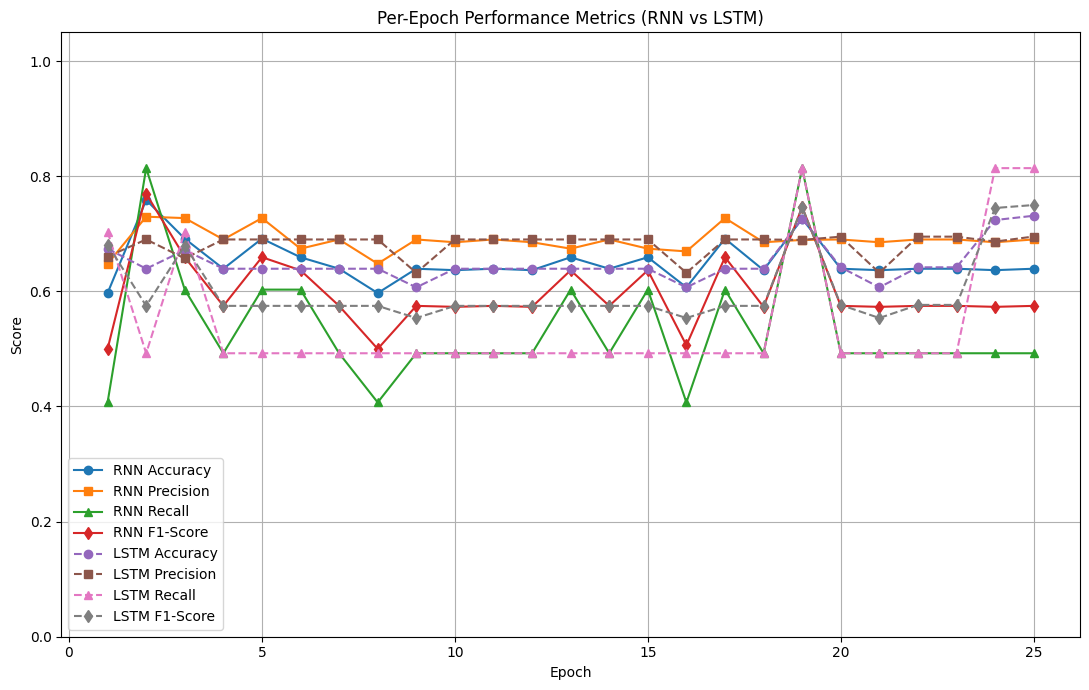

In [ ]:
# ======================================
# INSTALL LIBRARIES
# ======================================
!pip install tensorflow scikit-learn pandas numpy xgboost

# ======================================
# IMPORT LIBRARIES
# ======================================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, SimpleRNN, Dense, Dropout

# ======================================
# LOAD DATASET
# ======================================
df = pd.read_csv("/content/drive/MyDrive/PSM/psm1/Dataset/Features 1-7.csv")

print("Dataset shape:", df.shape)
print(df.head())

# ===============================
# REMOVE LEAKAGE 100% SAFELY
# ===============================
leakage_keywords = [
    "keyword", "pirated", "movie", "film", "title",
    "is_pirated", "movie_keyword", "contains", "found", "match",
    "label", "target"
]

cols_to_drop = [c for c in df.columns if any(k in c.lower() for k in leakage_keywords)]
print("Removing leakage:", cols_to_drop)

df = df.drop(columns=cols_to_drop, errors="ignore")

# ======================================
# SPLIT FEATURES & LABEL
# ======================================
X = df.drop("class", axis=1)
y = df["class"].astype(int)

# ======================================
# SCALE FEATURES
# ======================================
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Save normal 2D scaled for ML models
X2 = X_scaled.copy()

# ======================================
# RESHAPE FOR RNN / LSTM INPUT
# Shape required: (samples, timesteps, features)
# ======================================
X_rnn = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Train / Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_rnn, y, test_size=0.2, random_state=42, shuffle=True
)

# ======================================
# MODEL 1: RNN
# ======================================
rnn_model = Sequential([
    SimpleRNN(64, activation="tanh", input_shape=(1, X_rnn.shape[2])),
    Dropout(0.3),
    Dense(1, activation="sigmoid")
])

rnn_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

print("\n================ Training RNN Model ================")
rnn_model.fit(X_train, y_train, epochs=25, batch_size=32, verbose=1)

# Predict
rnn_pred = (rnn_model.predict(X_test) > 0.5).astype(int)

# Evaluate
rnn_acc = accuracy_score(y_test, rnn_pred)
rnn_prec = precision_score(y_test, rnn_pred)
rnn_rec = recall_score(y_test, rnn_pred)
rnn_f1 = f1_score(y_test, rnn_pred)

# ======================================
# MODEL 2: LSTM
# ======================================
lstm_model = Sequential([
    LSTM(64, activation="tanh", input_shape=(1, X_rnn.shape[2])),
    Dropout(0.3),
    Dense(1, activation="sigmoid")
])

lstm_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

print("\n================ Training LSTM Model ================")
lstm_model.fit(X_train, y_train, epochs=25, batch_size=32, verbose=1)

# Predict
lstm_pred = (lstm_model.predict(X_test) > 0.5).astype(int)

# Evaluate
lstm_acc = accuracy_score(y_test, lstm_pred)
lstm_prec = precision_score(y_test, lstm_pred)
lstm_rec = recall_score(y_test, lstm_pred)
lstm_f1 = f1_score(y_test, lstm_pred)

# ======================================
# PERFORMANCE COMPARISON TABLE
# ======================================
print("\n================ MODEL PERFORMANCE COMPARISON ================")
print(f"{'Model':<10} {'Accuracy':<10} {'Precision':<10} {'Recall':<10} {'F1-Score':<10}")
print(f"RNN      {rnn_acc:.4f}     {rnn_prec:.4f}       {rnn_rec:.4f}     {rnn_f1:.4f}")
print(f"LSTM     {lstm_acc:.4f}     {lstm_prec:.4f}       {lstm_rec:.4f}     {lstm_f1:.4f}")


import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.callbacks import Callback

# ======================================
# PER-EPOCH METRICS CALLBACK
# ======================================
class MetricsCallback(Callback):
    def __init__(self, X_val, y_val):
        super().__init__()
        self.X_val = X_val
        self.y_val = y_val
        self.acc = []
        self.prec = []
        self.rec = []
        self.f1 = []

    def on_epoch_end(self, epoch, logs=None):
        y_pred = (self.model.predict(self.X_val, verbose=0) > 0.5).astype(int)

        self.acc.append(accuracy_score(self.y_val, y_pred))
        self.prec.append(precision_score(self.y_val, y_pred))
        self.rec.append(recall_score(self.y_val, y_pred))
        self.f1.append(f1_score(self.y_val, y_pred))

# ======================================
# TRAIN MODELS
# ======================================
epochs = 25

rnn_cb = MetricsCallback(X_test, y_test)
lstm_cb = MetricsCallback(X_test, y_test)

rnn_model.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[rnn_cb],
    verbose=1
)

lstm_model.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[lstm_cb],
    verbose=1
)

# ======================================
# PLOT GRAPH (X-AXIS = EPOCH)
# ======================================
epoch_range = np.arange(1, epochs + 1)

plt.figure(figsize=(11,7))

# RNN metrics
plt.plot(epoch_range, rnn_cb.acc, marker='o', label='RNN Accuracy')
plt.plot(epoch_range, rnn_cb.prec, marker='s', label='RNN Precision')
plt.plot(epoch_range, rnn_cb.rec, marker='^', label='RNN Recall')
plt.plot(epoch_range, rnn_cb.f1, marker='d', label='RNN F1-Score')

# LSTM metrics
plt.plot(epoch_range, lstm_cb.acc, marker='o', linestyle='--', label='LSTM Accuracy')
plt.plot(epoch_range, lstm_cb.prec, marker='s', linestyle='--', label='LSTM Precision')
plt.plot(epoch_range, lstm_cb.rec, marker='^', linestyle='--', label='LSTM Recall')
plt.plot(epoch_range, lstm_cb.f1, marker='d', linestyle='--', label='LSTM F1-Score')

plt.xlabel("Epoch")
plt.ylabel("Score")
plt.title("Per-Epoch Performance Metrics (RNN vs LSTM)")
plt.ylim(0, 1.05)
plt.grid(True)
plt.legend(loc="best")

plt.tight_layout()
plt.show()





